Parte 2 - Implementando o algoritmo de retropropagação em Python



In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
'''
This Back-propagation algorithm is implemented on Bank note authentication UCI Dataset. Link is given below
Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
'''

print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()
dataset = shuffle(pd.read_csv("data_banknote_authentication.txt"))


...............Reading the Dataset  and Dataset Pre-Processing ................


In [ ]:
dataset.columns = ["Variance of Wavelet Transformed image", "Skewness of Wavelet Transformed image",
                "Curtosis of Wavelet Transformed image", "Entropy of image","Class"]

# Changing the values of the class to -1 and 1 for tanh activation function
dataset.loc[dataset['Class'] == 1, 'Class'] = -1
dataset.loc[dataset['Class'] == 0, 'Class'] = 1
x = dataset[["Variance of Wavelet Transformed image","Skewness of Wavelet Transformed image","Curtosis of Wavelet Transformed image","Entropy of image"]]
y = dataset[['Class']]

dataset

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Class
529,5.72270,5.83120,-2.40970,-0.24527,1
668,4.36340,0.46351,1.42810,2.02020,1
965,0.48797,3.56740,-4.38820,-3.81160,-1
930,-0.49241,0.89392,-1.62830,-0.56854,-1
428,2.55030,-4.95180,6.37290,-0.41596,1
...,...,...,...,...,...
404,0.58982,7.42660,1.23530,-2.95950,1
806,-4.29320,3.34190,0.77258,-0.99785,-1
368,2.19480,1.37810,1.15820,0.85774,1
1225,-4.06790,2.49550,0.79571,-1.10390,-1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)
print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)


Shape of X_Train :  (1096, 4)
Shape of Train class :  (1096, 1)
Shape of X_test :  (275, 4)
Shape of Test class :  (275, 1)


In [ ]:
# Normalizing data using Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time

print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)

Time Cost for Pre-processing and Reading the Dataset: 7.982188 seconds 
 


In [ ]:
# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)



In [ ]:

print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
np.random.seed(10)
inp = 4
hd = 6
out = 1

actual_out_size = y_train.size
epochs = 10000
eta = 0.001
alpha = 0.7
print("............... Setting 4 weights for hidden layers ................")
# Setting random weights for 4 hidden layers
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)


acc_list = []

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

............... Initializing hyperparameters ................
............... Setting 4 weights for hidden layers ................
Time Cost for Setting HyperParameters: 0.002919 seconds 
 


Parte 3 – Aplicação dos Ajustes de Parâmetros no Algoritmo

............... Training Backpropagation Algorithm ................
Training Accuracy: 95.0 %
Time Cost for Training algorithm: 45.583477 seconds 
 
............... Plotting Accuracy Curve ................


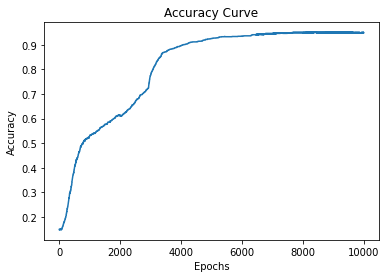

In [ ]:
print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for i in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    # Calculate accuracy
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_sigmoid_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)


    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_sigmoid_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Training Accuracy: "+str(round(acc_list[-1],2) * 100) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

print("............... Plotting Accuracy Curve ................")

plt.title("Accuracy Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(acc_list)
plt.show()



Parte 4 - Analisando os Resultados



In [ ]:
print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

l3_test = np.dot(l2_out_test, w3_l3)
l3_out = hyperbolic_tanh(l3_test)

l4_test = np.dot(l3_out, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)

# Calculate accuracy
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc/ actual_out_size) * 100



print("Testing Accuracy: "+str(round(acc_test,2)) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out_test)


............... Testing Backpropagation Algorithm ................
Testing Accuracy: 93.45 %
Time Cost for Testing algorithm: 0.003208 seconds 
 
[[-0.92228518]
 [-0.9222818 ]
 [ 0.91488689]
 [-0.92092408]
 [-0.9143056 ]
 [ 0.92507053]
 [-0.92436922]
 [-0.72088438]
 [-0.7376846 ]
 [ 0.70198733]
 [ 0.84481485]
 [ 0.93917845]
 [ 0.93892198]
 [-0.01586958]
 [ 0.63039397]
 [ 0.92205766]
 [-0.92615874]
 [ 0.70847374]
 [ 0.92414733]
 [ 0.91465368]
 [ 0.71370002]
 [-0.91540743]
 [-0.71513475]
 [-0.62053769]
 [-0.67512731]
 [ 0.75688957]
 [ 0.80476063]
 [ 0.88062588]
 [-0.79103174]
 [-0.91663312]
 [-0.65680097]
 [-0.92618199]
 [ 0.92047074]
 [ 0.93109013]
 [ 0.91648525]
 [-0.92761957]
 [-0.92881882]
 [ 0.92734676]
 [-0.94327813]
 [-0.62749859]
 [-0.92453615]
 [-0.72968523]
 [-0.72133126]
 [ 0.61887848]
 [-0.91417198]
 [-0.79847218]
 [ 0.2417071 ]
 [-0.94120424]
 [ 0.91159976]
 [ 0.93374845]
 [ 0.33572133]
 [ 0.92466845]
 [ 0.92723065]
 [-0.92637807]
 [-0.92062805]
 [ 0.94439962]
 [-0.92561621